In [78]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [4]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc
import numpy as np
import cmocean as cm
import glob
from salishsea_tools import (
    viz_tools, geo_tools, nc_tools
)
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow

%matplotlib inline

In [5]:
bath = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

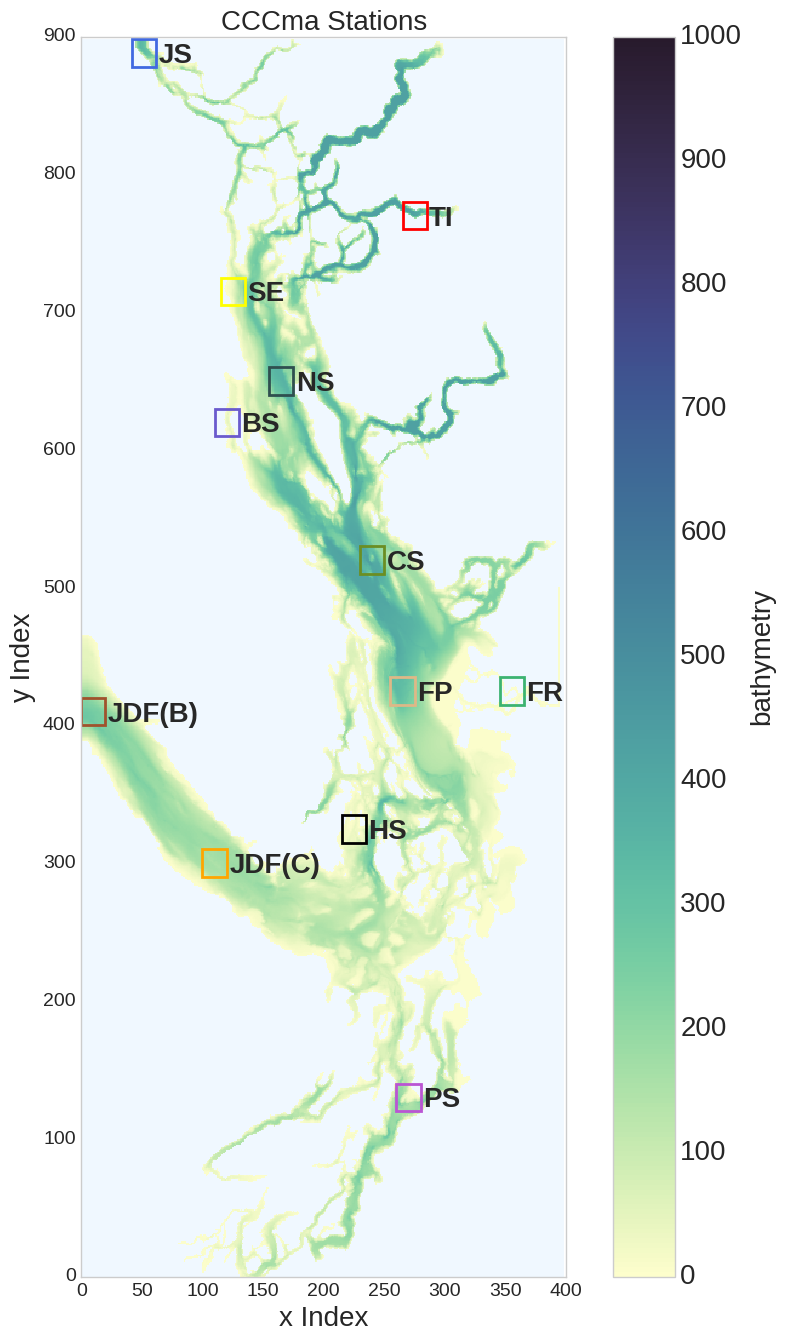

In [6]:
CCCma.one_panel_plot(bath1, cs.STATIONS, 'CCCma Stations', \
               cm.cm.deep,12,16,0,1000,'bathymetry','')

In [7]:
def one_panel_plot(surfdat_1, stns, tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):
    "TESTED"

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap
    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 20 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
    cbar = fig.colorbar(mesh, ax=ax)
    cbar.set_label(clabel, fontsize = 20 )
    cbar.ax.tick_params(labelsize=20)
 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cmap.set_bad('aliceblue')
    plt.suptitle(bigtit,fontsize=20)
    


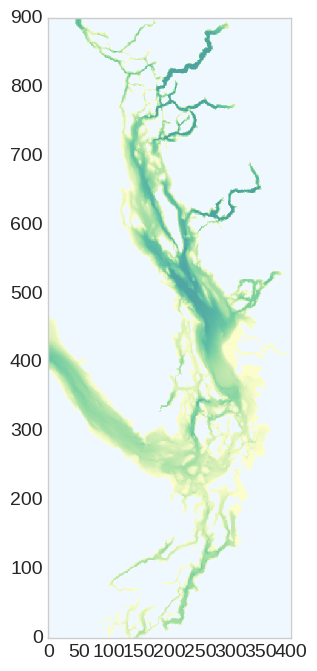

In [16]:
surfdat_1 = bath1
bigtit = 'CCCma Stations'
t_cmap = cm.cm.deep
xsize = 5
ysize = 8
v_min1 = 0
v_max1 = 1000
cl1 = 'bathymetry'
tit1 = ''

fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
cmap = t_cmap
tplt = np.ma.masked_values(surfdat_1,0)
ax.set_title(tit1,fontsize = 20 )
v_min = v_min1
v_max = v_max1
clabel = cl1

viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
cmap.set_bad('aliceblue')


(898, 398)


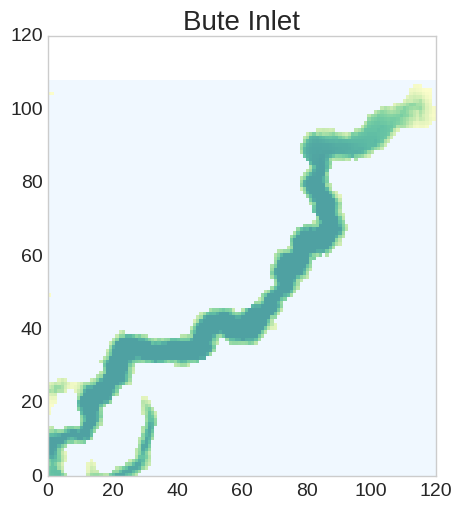

In [39]:
print(np.shape(bath1))
surfdat_1 = bath1[790:898,180:300]
bigtit = 'CCCma Stations'
t_cmap = cm.cm.deep
xsize = 5
ysize = 8
v_min1 = 0
v_max1 = 1000
cl1 = 'bathymetry'
tit1 = 'Bute Inlet'

fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
cmap = t_cmap
tplt = np.ma.masked_values(surfdat_1,0)
ax.set_title(tit1,fontsize = 20 )
v_min = v_min1
v_max = v_max1
clabel = cl1

viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
cmap.set_bad('aliceblue')


In [24]:
print(bath1[780:898,160:300])

[[37.25 53.8125 -- ..., -- -- --]
 [60.0625 66.3125 32.5 ..., -- -- --]
 [76.4375 47.9375 -- ..., -- -- --]
 ..., 
 [-- -- -- ..., 7.6875 4.0 --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]]


In [47]:
#surfdat_1 = bath1[790:898,180:300]
bute_js = []
bute_is = []
for j in range(790,898):
    arr = bath1[j,180:300]
    w = np.amax(arr)
    #print(w)
    result = np.where(arr == np.amax(arr))
    result = result[0]
    result = result + 180
    #print(result)
    js = np.zeros_like(result)
    js[:] = j
    bute_is.append(result)
    bute_js.append(js)

(898, 398)


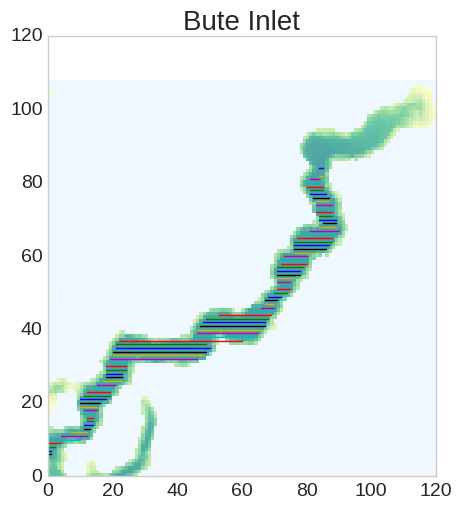

In [52]:
print(np.shape(bath1))
surfdat_1 = bath1[790:898,180:300]
bigtit = 'CCCma Stations'
t_cmap = cm.cm.deep
xsize = 5
ysize = 8
v_min1 = 0
v_max1 = 1000
cl1 = 'bathymetry'
tit1 = 'Bute Inlet'

fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
cmap = t_cmap
tplt = np.ma.masked_values(surfdat_1,0)
ax.set_title(tit1,fontsize = 20 )
v_min = v_min1
v_max = v_max1
clabel = cl1

viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
for i in range(0,len(bute_is)):
    ax.plot(bute_is[i]-180,bute_js[i]-790,)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
cmap.set_bad('aliceblue')


In [42]:
surfdat_1 = bath1[790:898,180:300]

print(bath1[790:810,180:200])
# for j in range(790,898):
#     arr = bath1[j,180:300]
790,183
791,182
792,182

[[292.6875 298.9375 310.75 314.75 246.5 149.0 -- -- -- -- -- -- 110.8125
  181.5 192.6875 194.75 173.0625 137.25 134.875 255.6875]
 [291.6875 310.5 314.8125 306.4375 134.625 -- -- -- -- -- -- -- 51.8125
  112.125 97.8125 98.6875 -- -- -- --]
 [281.0625 295.75 308.5625 175.0625 100.9375 -- -- -- -- -- -- -- 43.8125
  92.5625 79.1875 -- -- -- -- --]
 [229.0625 294.375 247.5 157.0 77.1875 -- -- -- -- -- -- -- 41.8125 66.25
  46.625 -- -- -- -- --]
 [259.9375 315.4375 298.75 246.3125 135.0625 61.0 -- -- -- -- -- -- --
  32.75 -- -- -- -- -- --]
 [383.375 390.25 340.5 238.75 126.0625 71.25 -- -- -- -- -- -- -- -- -- --
  -- -- -- --]
 [428.0 428.0 373.375 232.8125 109.75 50.1875 -- -- -- -- -- -- -- -- -- --
  -- -- -- --]
 [428.0 428.0 410.0 236.3125 151.6875 -- -- -- -- -- -- -- -- -- -- -- --
  -- -- --]
 [428.0 428.0 428.0 348.5625 238.3125 175.6875 -- -- -- -- -- -- -- -- --
  -- -- -- -- --]
 [428.0 428.0 428.0 428.0 428.0 333.4375 228.875 236.5 167.625 199.0 207.75
  242.0625 -- -- -